**IRIS FLOWER CLASSIFICATION**


Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.



Although the Scikit-learn library provides a dataset for iris flower classification, you can also
download the same dataset from here for the task of iris flower classification with Machine
Learning.

LOAD LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
data=files.upload()

Saving Iris.csv to Iris.csv


In [2]:
import seaborn as sbn
import matplotlib.pyplot as plot

In [3]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix,recall_score
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

**Check data properties and Data cleaning **

In [5]:
df=pd.read_csv("Iris.csv")

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.size

750

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


<ipython-input-10-6af517ecf5a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(df.corr(),annot=True)


<Axes: >

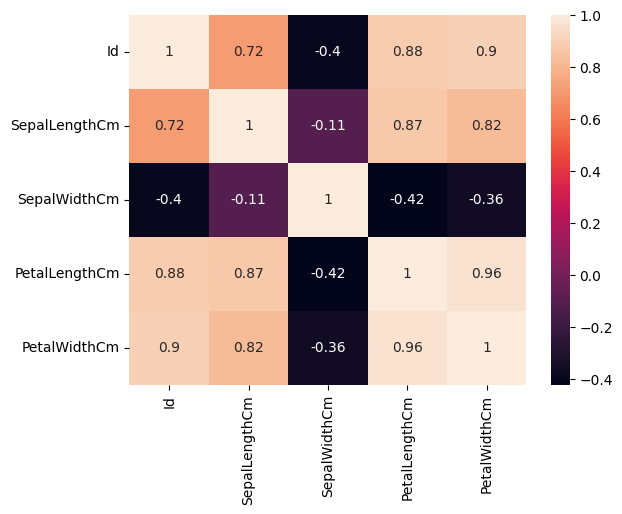

In [10]:
sbn.heatmap(df.corr(),annot=True)

In [ ]:
for i in df.columns:
  print(i,df[i].unique(),end="  ")
  print()

Id [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]  
SepalLengthCm [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]  
SepalWidthCm [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]  
PetalLengthCm [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 

# **DATA VISUALIZATION**

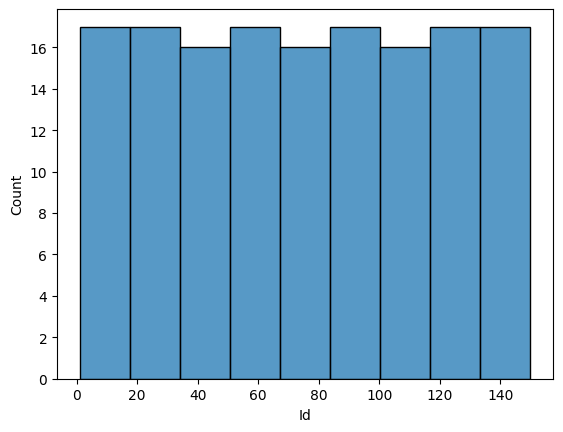

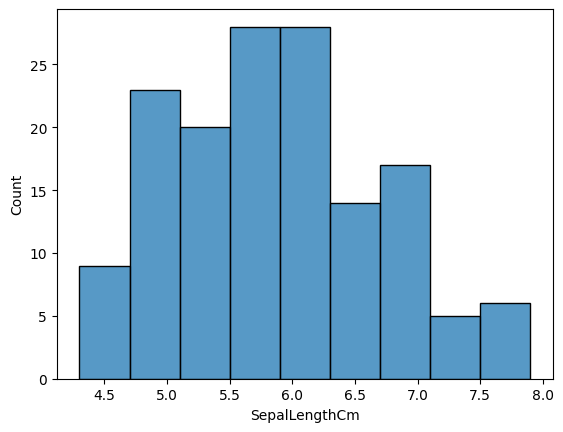

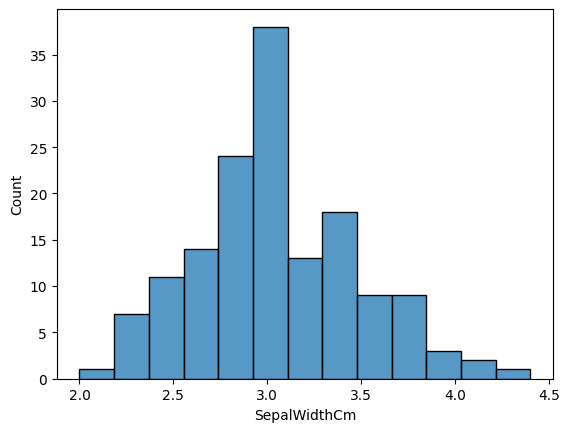

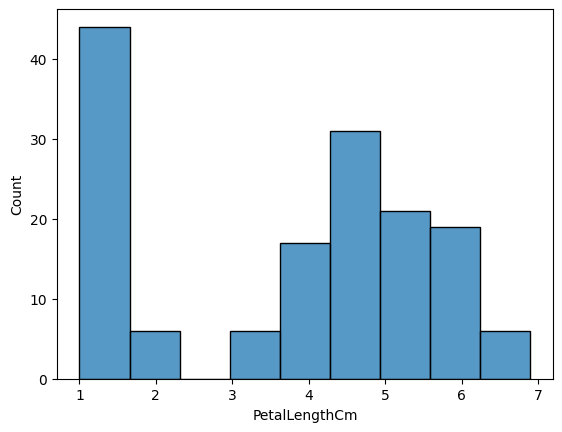

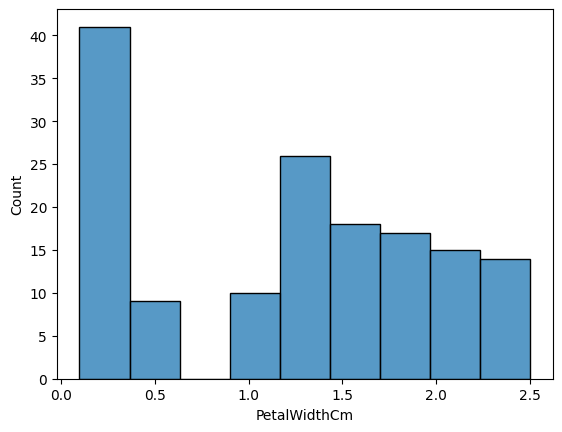

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sbn.histplot(x=df[i])
        plot.show();

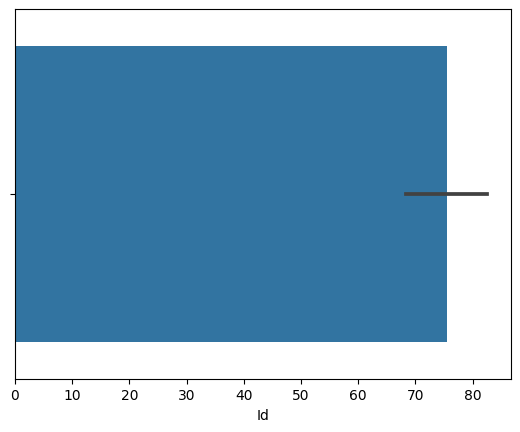

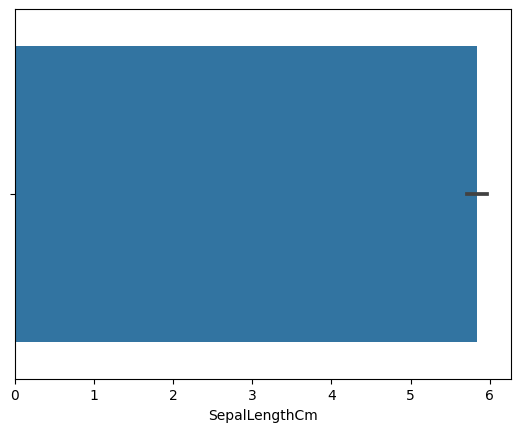

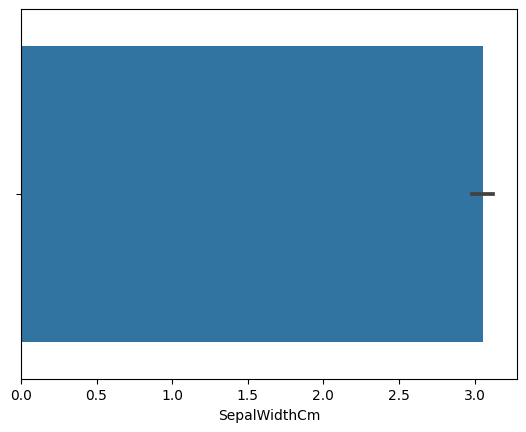

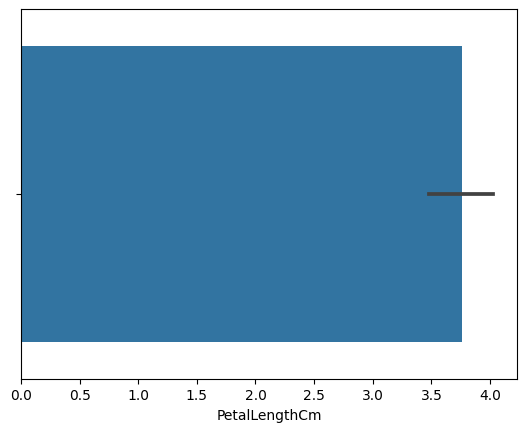

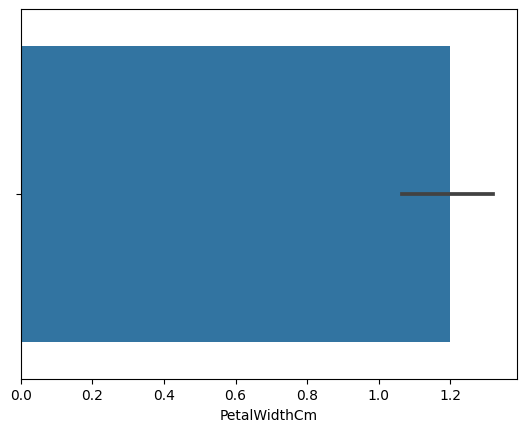

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sbn.barplot(x=df[i])
        plot.show();

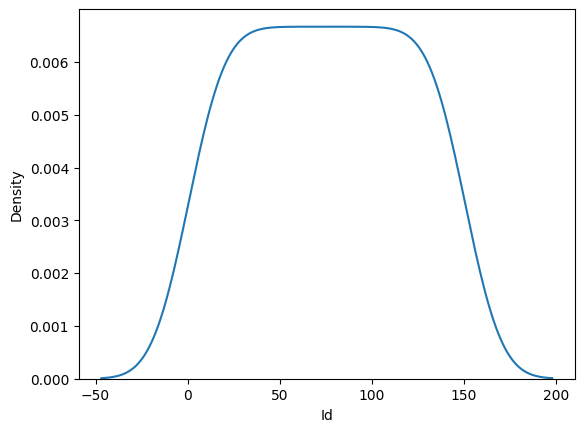

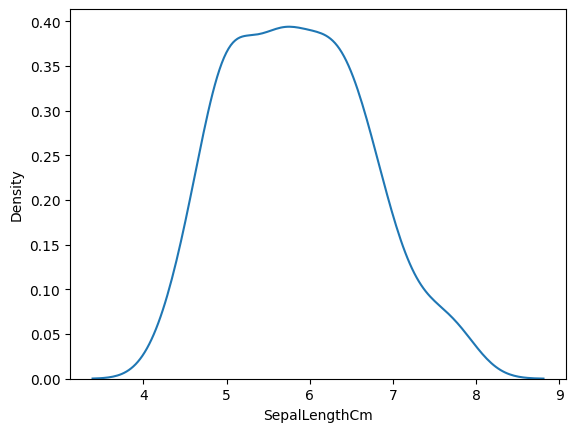

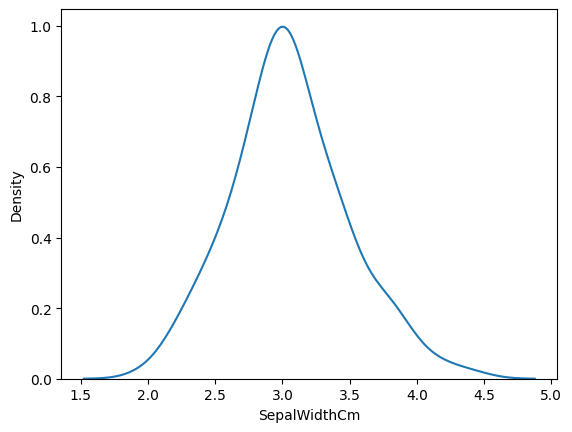

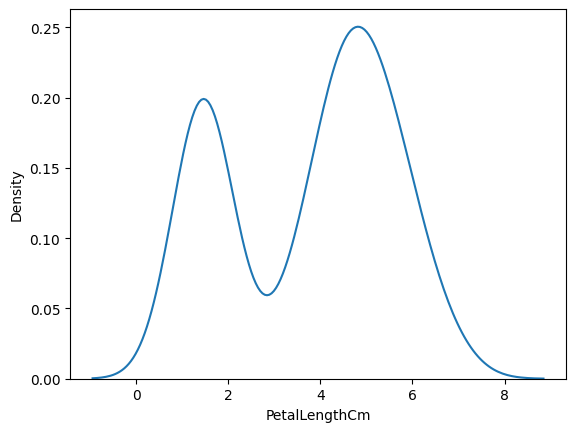

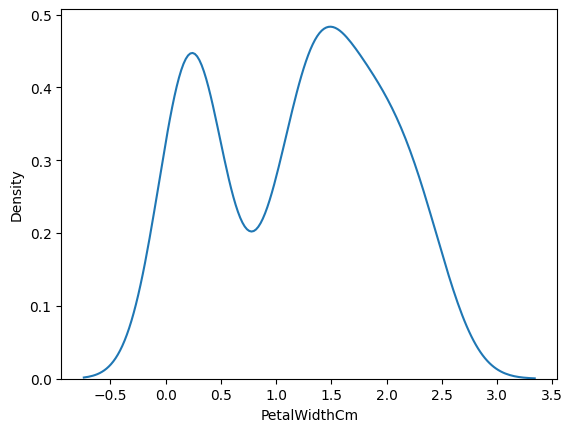

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sbn.kdeplot(x=df[i])
        plot.show();

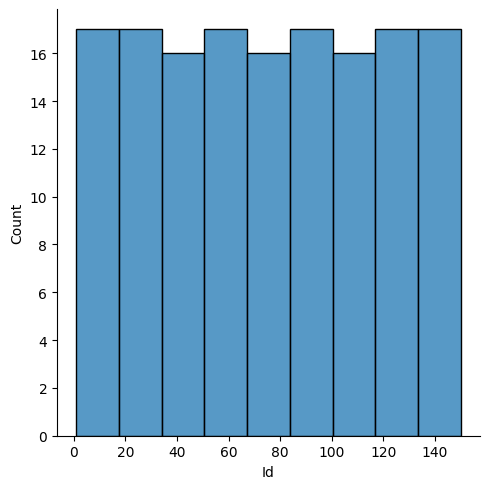

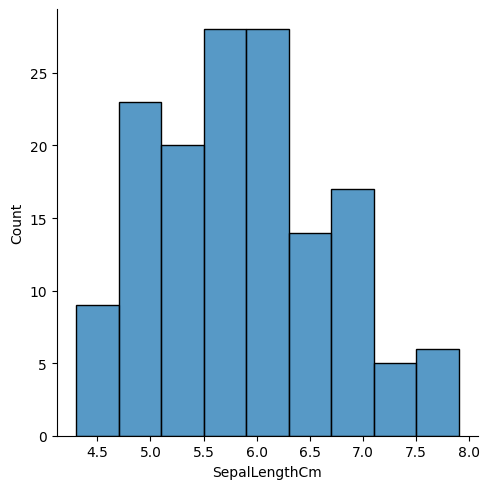

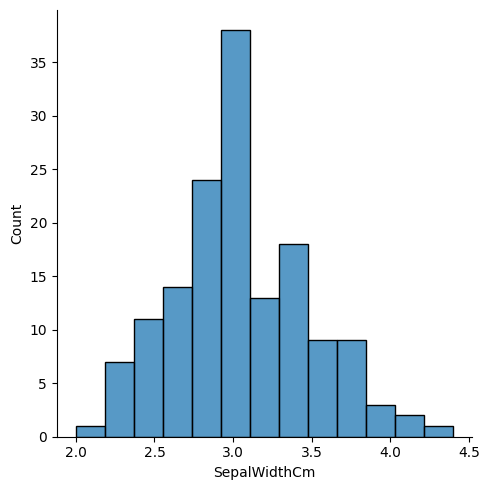

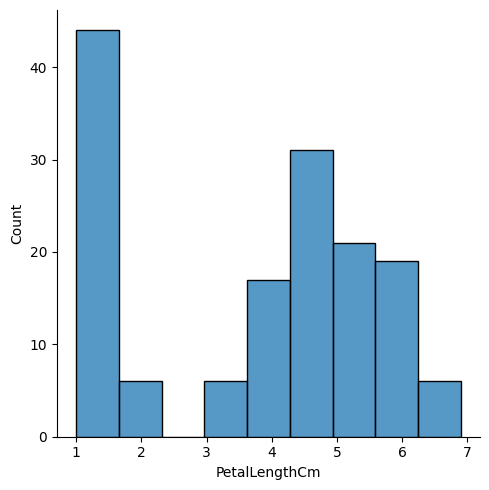

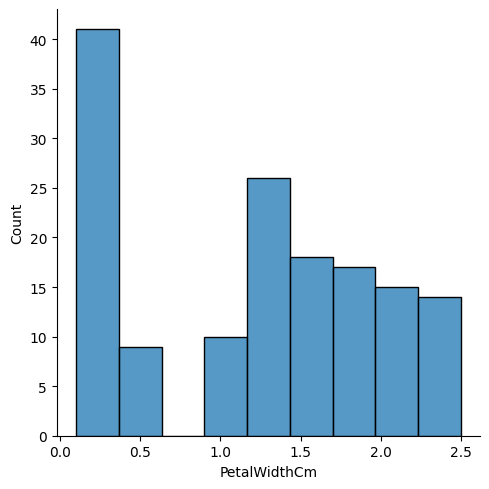

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sbn.displot(x=df[i])
        plot.show();

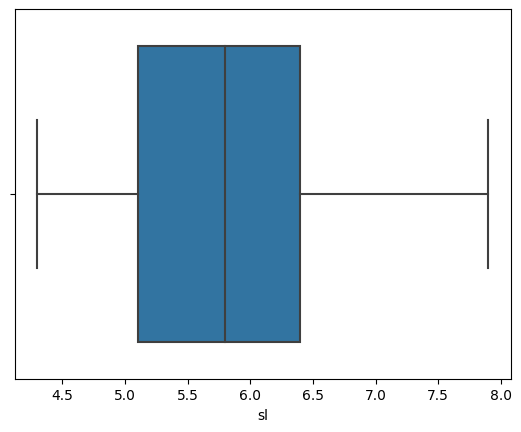

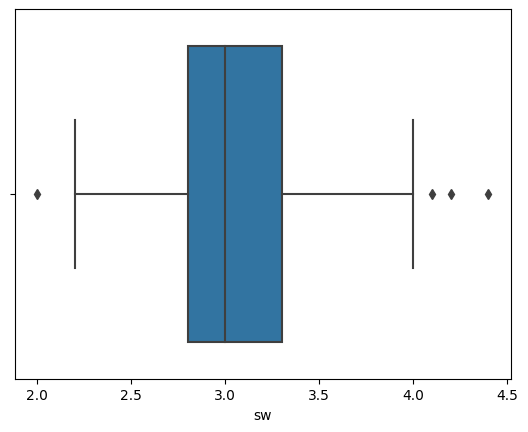

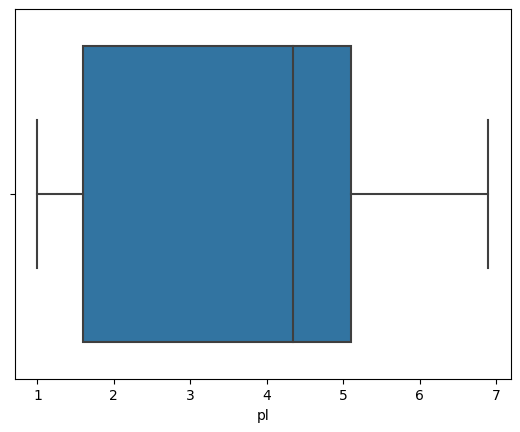

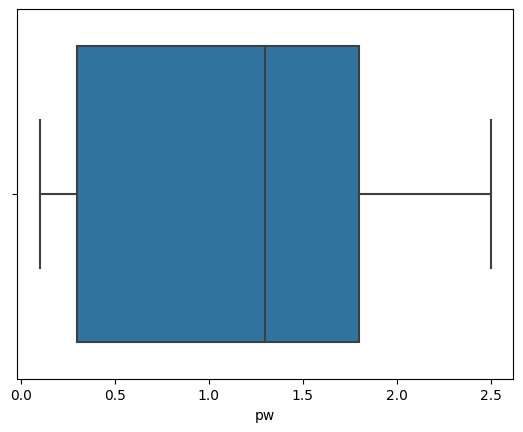

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sbn.boxplot(x=df[i])
        plot.show();

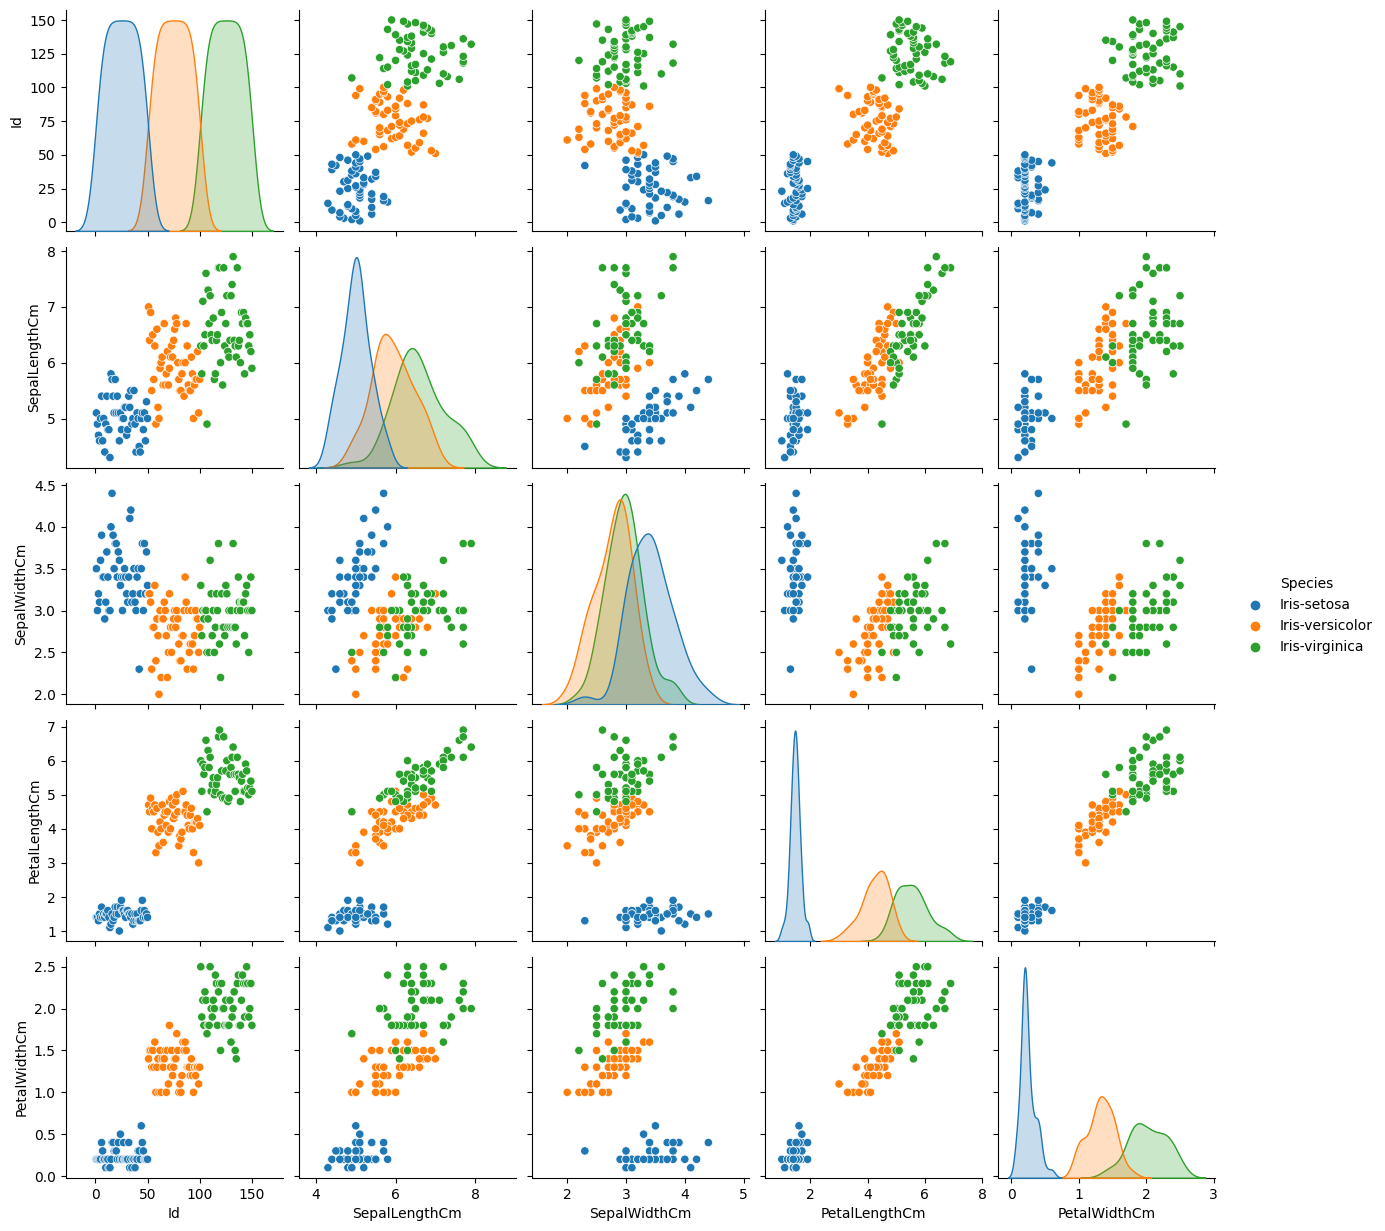

In [ ]:
sbn.pairplot(data=df,kind="scatter", hue="Species");
plot.show();

In [ ]:
preetam = df.columns

In [ ]:
preetam

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
G=[]
for i in preetam:
  if i!='Species':
    G.append(i)

In [ ]:
G

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# **convert categorical features into numerical feature**

# **FEATURE SELECTION & MACHINE LEARNING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
category_column = df.select_dtypes(include=['object']).columns
for i in category_column:
    label = LabelEncoder()
    encoded = label.fit_transform(df[i])
    df[i] = encoded

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
x = df.iloc[:,:-1].values

In [ ]:
x

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [ ]:
y = df.iloc[:,-1].values

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<Axes: ylabel='count'>

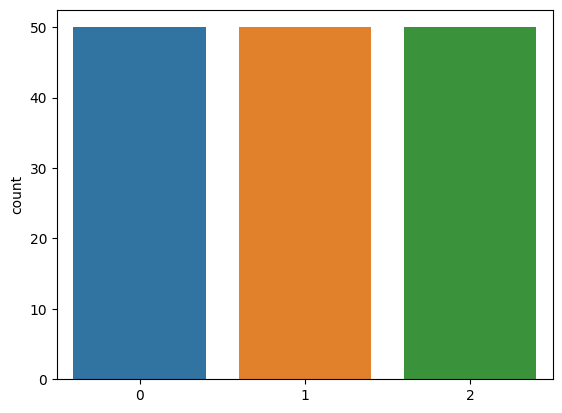

In [ ]:
sbn.countplot(x = y)

In [ ]:
df['Species'].nunique()

3

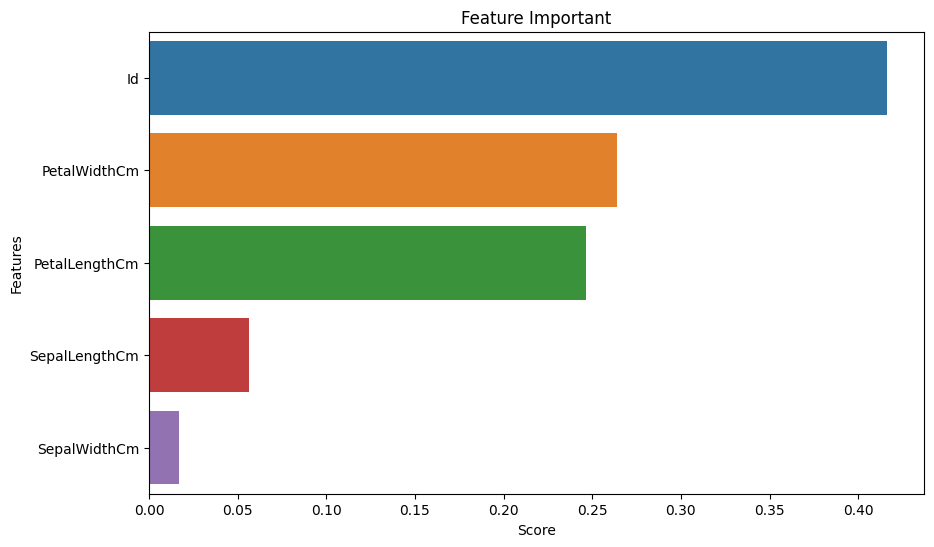

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
num_features = 5
target_variable = "Species"
X = df.drop(target_variable, axis=1)
y = df[target_variable]
model = RandomForestClassifier()
model.fit(X, y)
importance_scores = model.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plot.figure(figsize=(10, 6))
sbn.barplot(x=feature_importance.values, y=feature_importance.index)
plot.xlabel('Score')
plot.ylabel('Features')
plot.title('Feature Important')
plot.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,shuffle=True)

In [ ]:
model=RandomForestClassifier()
model.fit(x_train, y_train)
print("model trained  {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_test = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train :: ",score_train)
print("Model accuracy on test :: ", score_test)
print("confusion_matrix train :: ", con_train)
print("confusion_matrix test :: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum())
print("*"*60)

model trained  RandomForestClassifier()
Model accuracy on train ::  1.0
Model accuracy on test ::  1.0
confusion_matrix train ::  [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
confusion_matrix test ::  [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Wrong Predictions made: 0
************************************************************


In [ ]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"))
OUTPUT.sample(10)

,ACTUAL,PREDICTION
138,2,2
100,2,2
41,0,0
54,1,1
22,0,0
90,1,1
32,0,0
144,2,2
39,0,0
46,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(x_train,y_train)
predictions = linearRegression.predict(x_test)
print(r2_score(y_test,predictions))

0.9446026069799255


In [ ]:
x

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print('train accuracy: ',np.round(RF.score(x_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(RF.score(x_test,y_test),3)*100,'% \n')

train accuracy:  99.9 % 

test accuracy:  97.8 % 



In [ ]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
print('train accuracy: ',np.round(xg.score(x_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(xg.score(x_test,y_test),3)*100,'% \n')

train accuracy:  100.0 % 

test accuracy:  100.0 % 

